### Which countries produce the most successful F1 drivers
Factors:
Number of race wins
Ratio of race wins to total number of races
Scaled points
Teammate comparison (Giving evidence based reasons)
Which countries produce the best 


In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [431]:
driver_standings_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/driver_standings.csv')
drivers_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/drivers.csv')
seasons_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/seasons.csv')
results_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/results.csv')

In [432]:
driver_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34595 entries, 0 to 34594
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34595 non-null  int64  
 1   raceId             34595 non-null  int64  
 2   driverId           34595 non-null  int64  
 3   points             34595 non-null  float64
 4   position           34595 non-null  int64  
 5   positionText       34595 non-null  object 
 6   wins               34595 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [433]:
driver_standings_df.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34595.000000,34595.000000,34595.000000,34595.000000,34595.000000,34595.000000
mean,42944.384188,580.120104,313.460760,14.114939,19.778928,0.273074
std,21859.815278,289.290183,272.052171,37.235186,16.331054,1.024520
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19767.500000,352.000000,87.000000,0.000000,8.000000,0.000000
50%,49910.000000,600.000000,222.000000,1.000000,16.000000,0.000000
75%,59299.500000,803.000000,517.000000,10.000000,26.000000,0.000000
max,72871.000000,1132.000000,860.000000,575.000000,108.000000,19.000000


In [434]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [435]:
driver_standings_df.groupby('driverId').max(numeric_only=True)['wins']


driverId
1      11
2       0
3       9
4       7
5       1
       ..
856     0
857     0
858     0
859     0
860     0
Name: wins, Length: 852, dtype: int64

In [436]:
drivers_df[drivers_df['driverId'] == 830]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


In [437]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Below is the dataframe containing all of the driver results

In [438]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


`df_overall` which contains the total number of wins for each driver along with the driver details is defined. It is a merger between<br>
`results_df` and `drivers_df`

In [439]:
df_overall = results_df[results_df['positionOrder']==1].groupby('driverId').sum(numeric_only=True)[['positionOrder', 'points', 'laps']].sort_values(by='positionOrder', ascending=False )

In [491]:
#Sandbox
results_df.groupby('driverId').sum(numeric_only=True)[['positionOrder', 'points', 'laps']].sort_values(by='positionOrder', ascending=False )
results_df[results_df['positionOrder']==1][['positionOrder','driverId']].groupby('driverId').sum()
pd.DataFrame(results_df.groupby('driverId').count()['positionOrder'])

,positionOrder
driverId,
1,344
2,184
3,206
4,392
5,112
...,...
856,11
857,34
858,33


In [498]:
df_overall_2 = drivers_df.copy()
df_overall_2 = df_overall_2.merge(pd.DataFrame(results_df[results_df['positionOrder']==1].groupby('driverId').sum(numeric_only=True)['positionOrder']), on='driverId', how='left')
df_overall_2 = df_overall_2.merge(results_df.groupby('driverId').sum(numeric_only=True)[['points', 'laps']], on='driverId', how = 'left')
df_overall_2.rename(columns={'positionOrder':'wins'}, inplace=True)
df_overall_2 = df_overall_2.merge(pd.DataFrame(results_df.groupby('driverId').count()['positionOrder']), on='driverId', how='left')
df_overall_2.rename(columns={'positionOrder':'races'}, inplace=True)
df_overall_2.fillna({'wins': 0, 'points':0}, inplace=True)
df_overall_2['wins'] = df_overall_2['wins'].astype(int)
df_overall_2.to_csv('../Datasets/driver_info.csv')
df_overall_2[df_overall_2['driverId'] == 30]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,wins,points,laps,races
29,30,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher,91,1566.0,16824,308


In [496]:
df_overall_2[['wins', 'laps']]

,wins,laps
0,104.0,19637
1,0.0,9699
2,23.0,11159
3,32.0,21173
4,1.0,5975
...,...,...
854,0.0,614
855,0.0,1916
856,0.0,1727
857,0.0,293


In [440]:
df_overall=df_overall.rename(columns={'positionOrder': 'wins'})
df_overall

,wins,points,laps
driverId,,,
1,104,2469.0,6237
30,91,910.0,5802
830,61,1531.5,3681
20,53,1250.0,3109
117,51,461.5,3296
...,...,...,...
525,1,8.0,200
526,1,8.0,200
559,1,8.0,200


In [441]:
df_overall = df_overall.merge(drivers_df, on='driverId', how='inner')
df_overall

,driverId,wins,points,laps,driverRef,number,code,forename,surname,dob,nationality,url
0,1,104,2469.0,6237,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,30,91,910.0,5802,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
2,830,61,1531.5,3681,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
3,20,53,1250.0,3109,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,117,51,461.5,3296,prost,\N,\N,Alain,Prost,1955-02-24,French,http://en.wikipedia.org/wiki/Alain_Prost
...,...,...,...,...,...,...,...,...,...,...,...,...
109,525,1,8.0,200,bryan,\N,\N,Jimmy,Bryan,1926-01-28,American,http://en.wikipedia.org/wiki/Jimmy_Bryan
110,526,1,8.0,200,ruttman,\N,\N,Troy,Ruttman,1930-03-11,American,http://en.wikipedia.org/wiki/Troy_Ruttman
111,559,1,8.0,200,flaherty,\N,\N,Pat,Flaherty,1926-01-06,American,http://en.wikipedia.org/wiki/Pat_Flaherty_(rac...
112,577,1,4.0,98,musso,\N,\N,Luigi,Musso,1924-07-28,Italian,http://en.wikipedia.org/wiki/Luigi_Musso


In [442]:
df_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     114 non-null    int64  
 1   wins         114 non-null    int64  
 2   points       114 non-null    float64
 3   laps         114 non-null    int64  
 4   driverRef    114 non-null    object 
 5   number       114 non-null    object 
 6   code         114 non-null    object 
 7   forename     114 non-null    object 
 8   surname      114 non-null    object 
 9   dob          114 non-null    object 
 10  nationality  114 non-null    object 
 11  url          114 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 10.8+ KB


`df_overall_by_nationality` is defined as the total number of wins grouped by each nationality

In [443]:
df_overall_by_nationality = df_overall.groupby('nationality').sum(numeric_only = True)['wins']
df_overall_by_nationality =df_overall_by_nationality.sort_values(ascending =False)
df_overall_by_nationality

nationality
British          312
German           179
Brazilian        101
French            81
Dutch             61
Finnish           57
Australian        43
Italian           43
Austrian          41
Argentine         38
Spanish           35
American          33
Canadian          17
New Zealander     12
Swedish           12
Belgian           11
South African     10
Mexican            8
Colombian          7
Swiss              7
Monegasque         6
Polish             1
Venezuelan         1
Name: wins, dtype: int64

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_27815/2857012635.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


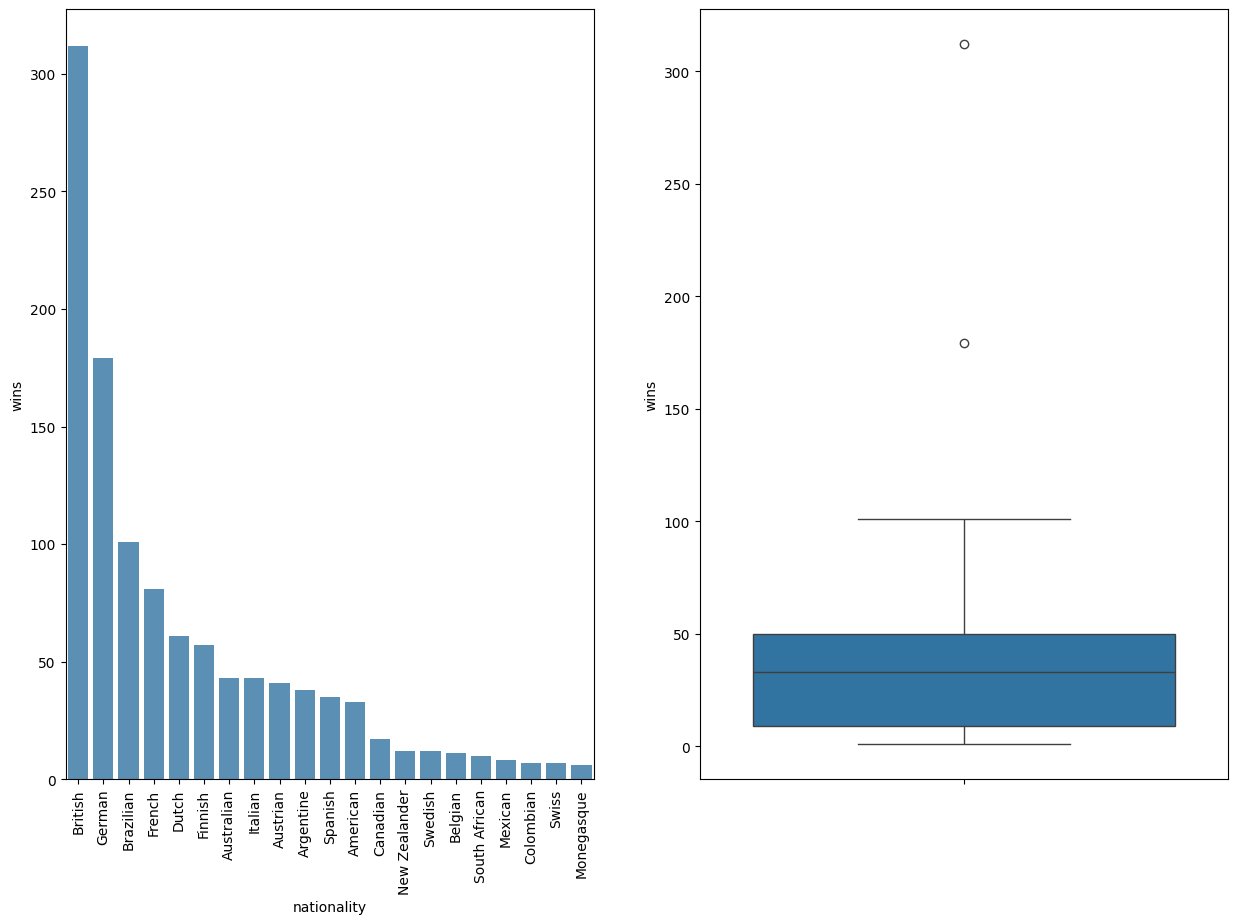

In [444]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,10))
plt.xticks(rotation=90)
sns.barplot(df_overall_by_nationality[df_overall_by_nationality>5], ax=ax[0], alpha = 0.8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.boxplot(df_overall_by_nationality, ax=ax[1]);



In [445]:
df_driver_counts = df_overall.groupby('nationality').count()['driverId']
df_driver_counts = df_driver_counts.loc[df_overall_by_nationality.index]
df_driver_counts

nationality
British          21
German            7
Brazilian         6
French           14
Dutch             1
Finnish           5
Australian        4
Italian          15
Austrian          3
Argentine         3
Spanish           2
American         15
Canadian          2
New Zealander     2
Swedish           3
Belgian           2
South African     1
Mexican           2
Colombian         1
Swiss             2
Monegasque        1
Polish            1
Venezuelan        1
Name: driverId, dtype: int64

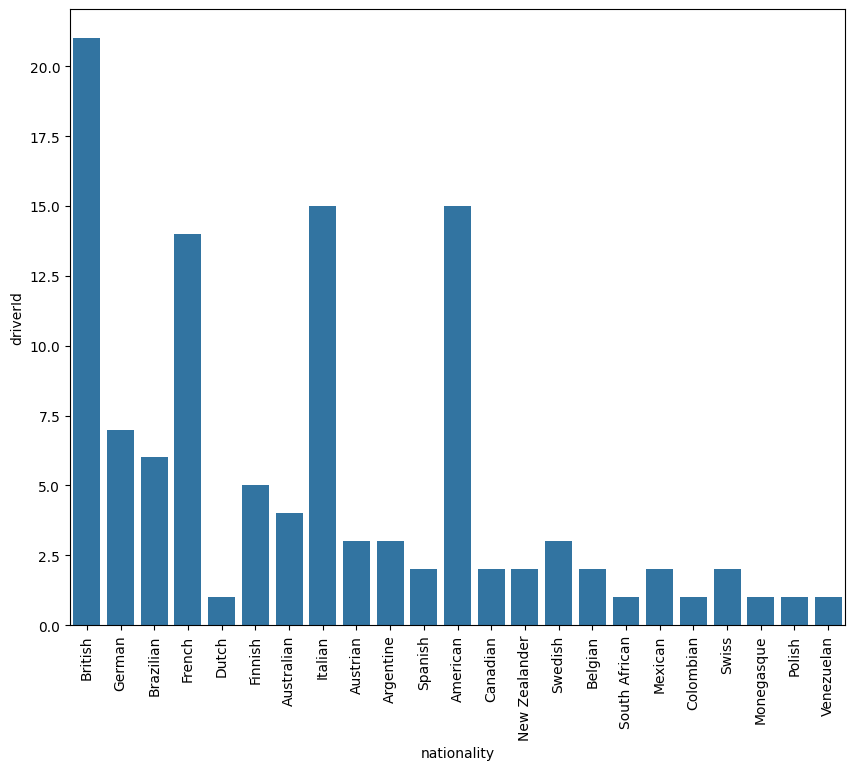

In [446]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.barplot(df_driver_counts)
plt.xticks(rotation = 90);


In [447]:
df_driver_counts_sorted = df_driver_counts.loc[df_overall_by_nationality.index]

In [448]:
df_races_by_nationality = results_df.merge(drivers_df, how='inner', on = 'driverId')
df_races_by_nationality = df_races_by_nationality.groupby(['nationality']).count()['resultId']
df_races_by_nationality= df_races_by_nationality.loc[df_overall_by_nationality.index]

In [449]:
df_races_by_nationality

nationality
British          4521
German           2418
Brazilian        1953
French           3072
Dutch             524
Finnish          1181
Australian        874
Italian          3418
Austrian          690
Argentine         373
Spanish           889
American         1312
Canadian          486
New Zealander     401
Swedish           510
Belgian           591
South African     210
Mexican           456
Colombian         125
Swiss             496
Monegasque        166
Polish             99
Venezuelan        120
Name: resultId, dtype: int64

Text(0, 0.5, 'Races competed in')

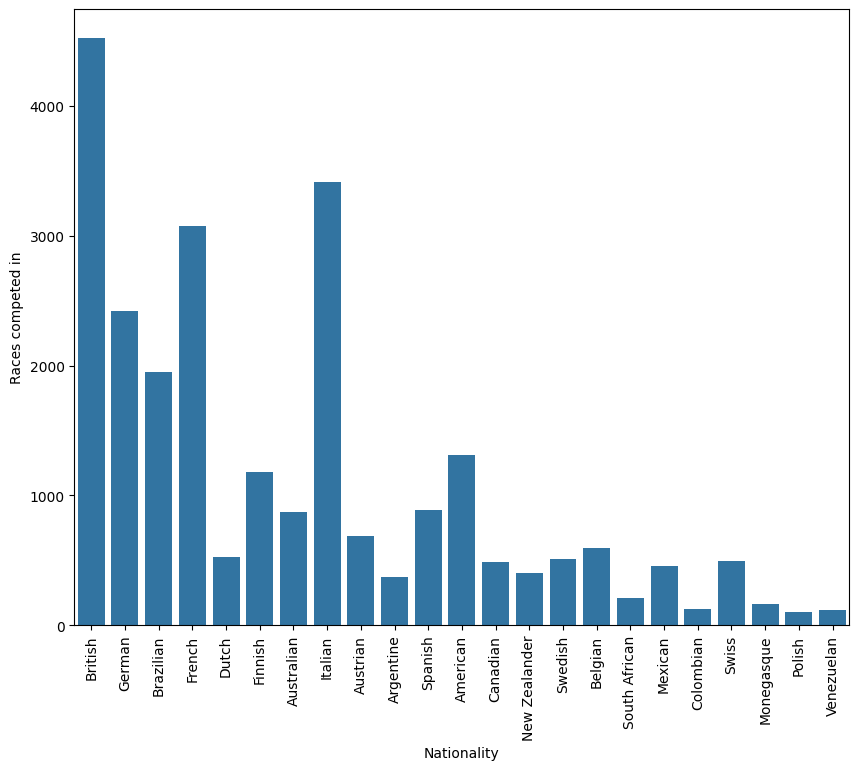

In [450]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(df_races_by_nationality)
plt.xticks(rotation = 90);
ax.set_xlabel('Nationality')
ax.set_ylabel('Races competed in')

In [451]:
df_number_races = results_df.groupby('driverId').count()[['positionOrder', 'points', 'laps']].sort_values(by='positionOrder', ascending=False )
df_number_races['races'] = df_number_races['positionOrder']
df_number_races.drop(['positionOrder', 'points', 'laps'], axis = 1, inplace=True)
df_number_races.columns.name = None

In [452]:
df_number_races

,races
driverId,
4,392
8,352
1,344
22,326
18,309
...,...
584,1
419,1
582,1


In [453]:
df_overall = df_number_races.merge(df_overall, on='driverId', how = 'inner')
df_overall

,driverId,races,wins,points,laps,driverRef,number,code,forename,surname,dob,nationality,url
0,4,392,32,485.0,1952,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
1,8,352,21,255.0,1232,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
2,1,344,104,2469.0,6237,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,22,326,11,110.0,640,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
4,18,309,15,265.0,898,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,786,8,1,4.0,77,fagioli,\N,\N,Luigi,Fagioli,1898-06-09,Italian,http://en.wikipedia.org/wiki/Luigi_Fagioli
110,559,6,1,8.0,200,flaherty,\N,\N,Pat,Flaherty,1926-01-06,American,http://en.wikipedia.org/wiki/Pat_Flaherty_(rac...
111,657,5,2,17.0,400,vukovich,\N,\N,Bill,Vukovich,1918-12-13,American,http://en.wikipedia.org/wiki/Bill_Vukovich
112,628,5,1,8.0,200,sweikert,\N,\N,Bob,Sweikert,1926-05-20,American,http://en.wikipedia.org/wiki/Bob_Sweikert


In [454]:
df_races =  df_overall.groupby('nationality').sum()['races'].sort_values(ascending = False)
df_races_by_nationality

nationality
British          4521
German           2418
Brazilian        1953
French           3072
Dutch             524
Finnish          1181
Australian        874
Italian          3418
Austrian          690
Argentine         373
Spanish           889
American         1312
Canadian          486
New Zealander     401
Swedish           510
Belgian           591
South African     210
Mexican           456
Colombian         125
Swiss             496
Monegasque        166
Polish             99
Venezuelan        120
Name: resultId, dtype: int64

In [455]:
df_nationality = df_races_by_nationality.copy()

In [456]:
pd.DataFrame(drivers_df['nationality'].value_counts())

,count
nationality,
British,166
American,158
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Belgian,23
Swiss,23


In [457]:
df_overall.groupby('nationality').max(numeric_only=True)['wins']

nationality
American          12
Argentine         24
Australian        14
Austrian          25
Belgian            8
Brazilian         41
British          104
Canadian          11
Colombian          7
Dutch             61
Finnish           21
French            51
German            91
Italian           13
Mexican            6
Monegasque         6
New Zealander      8
Polish             1
South African     10
Spanish           32
Swedish           10
Swiss              5
Venezuelan         1
Name: wins, dtype: int64

In [458]:
df_nationality = drivers_df['nationality'].value_counts()
df_nationality = pd.DataFrame(df_nationality)
df_nationality = df_nationality.merge(pd.DataFrame((results_df.merge(drivers_df, on='driverId')).groupby('nationality').count()['constructorId']), on='nationality')
df_nationality = df_nationality.merge(pd.DataFrame(df_overall.groupby('nationality').median(numeric_only = True)['wins']), on='nationality', how='left')
df_nationality.rename(columns = {'constructorId': 'races', 'count': 'drivers', 'wins': 'median_wins'}, inplace=True)
df_nationality = df_nationality.merge(pd.DataFrame(df_overall.groupby('nationality').max(numeric_only=True)['wins']), on='nationality', how='left')
df_nationality.rename(columns={'wins':'max_wins'}, inplace=True)
df_nationality['median_wins'].fillna(0, inplace = True)
df_nationality['max_wins'].fillna(0, inplace = True)
df_nationality




/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_27815/3247602562.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nationality['median_wins'].fillna(0, inplace = True)
/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_27815/3247602562.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

,drivers,races,median_wins,max_wins
nationality,,,,
British,166,4521,6.0,104.0
American,158,1312,1.0,12.0
Italian,99,3418,1.0,13.0
French,73,3072,2.0,51.0
German,50,2418,6.0,91.0
Brazilian,32,1953,12.5,41.0
Argentine,24,373,12.0,24.0
Belgian,23,591,5.5,8.0
Swiss,23,496,3.5,5.0


In [459]:
df_nationality.to_csv('../Datasets/nationalities.csv')

In [460]:
#Test area
df_overall[].fillna()

In [461]:
df_overall = pd.concat([df_overall,drivers_df]).drop_duplicates(subset='driverId')

,driverId,races,wins,points,laps,driverRef,number,code,forename,surname,dob,nationality,url
0,4,392.0,32.0,485.0,1952.0,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
1,8,352.0,21.0,255.0,1232.0,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
2,1,344.0,104.0,2469.0,6237.0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,22,326.0,11.0,110.0,640.0,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
4,18,309.0,15.0,265.0,898.0,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,856,NaN,NaN,NaN,NaN,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,NaN,NaN,NaN,NaN,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,NaN,NaN,NaN,NaN,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,NaN,NaN,NaN,NaN,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


In [346]:
df_overall.to_csv('../Datasets/test.csv')

In [345]:
df_overall

,driverId,races,wins,points,laps,driverRef,number,code,forename,surname,dob,nationality,url
0,4,392,32,485.0,1952,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
1,8,352,21,255.0,1232,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
2,1,344,104,2469.0,6237,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,22,326,11,110.0,640,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
4,18,309,15,265.0,898,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,786,8,1,4.0,77,fagioli,\N,\N,Luigi,Fagioli,1898-06-09,Italian,http://en.wikipedia.org/wiki/Luigi_Fagioli
110,559,6,1,8.0,200,flaherty,\N,\N,Pat,Flaherty,1926-01-06,American,http://en.wikipedia.org/wiki/Pat_Flaherty_(rac...
111,657,5,2,17.0,400,vukovich,\N,\N,Bill,Vukovich,1918-12-13,American,http://en.wikipedia.org/wiki/Bill_Vukovich
112,628,5,1,8.0,200,sweikert,\N,\N,Bob,Sweikert,1926-05-20,American,http://en.wikipedia.org/wiki/Bob_Sweikert


In [499]:
df_overall_2[df_overall_2['nationality'] == 'American-Italian']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,wins,points,laps,races
491,491,thiele,\N,\N,Alfonso,Thiele,1920-04-05,American-Italian,http://en.wikipedia.org/wiki/Alfonso_Thiele,0,0.0,32,2
